### 1. Введение:
I. Для начала, пожалуйста, приведите 5 примеров применения методов машинного обучения в жизни. В чём преимущество использования методов машинного обучения в каждом из ваших примеров?

Примеры использования машинного обучения:
1. Распознавание лиц в телефоне → автоматическая идентификация (повышает безопасность и удобство).
2. Рекомендации фильмов на Netflix → прогноз интересов пользователя (получение более персонализированного контента, экономит время и повышает вовлеченность). 
3. Навигация и прогноз пробок в Google Maps → анализ маршрутов и времени (помогает выбрать оптимальный маршрут и сократить время в пути).
4. Предсказание цен на акции → финансовое прогнозирование (помогает агентствам и покупателям принимать более обоснованные решения на рынке недвижимости).
5. Фильтрация спама в почте → классификация писем (защищает пользователя от нежелательной почты и экономит время).

II. Используйте классификацию задач, представленную во введении, чтобы определить, к какому классу можно отнести задачи из приведённой выше таблицы и 5 приведённых вами примеров.

1. Распознавание лиц -> Определяет, кто изображен на фото -> Классификация
2. Рекомендации фильмов -> Поиск закономерности между пользователями и фильмами -> Ассоциация
3. Прогнозирование пробок -> Предсказание числового значения времени в пути или скорости движения -> Регрессия
4. Фильтрация спама -> Деление писем на 2 категории -> Классификация
5. Прогнозирование цен на недвижимость -> Числовой результат - цена жилья ->Регрессия

Определение вида задач из таблицы:

1. Прогнозирование цены дома -> Регрессия
2. Вернет ли клиент кредит -> Классификация
3. Прогнозирование времени приема лекарства -> Регрессия
4. Какое лекарство дать пациенту -> Классификация
5. Выберите сегмент клиентов для рекламной коммуникации -> Кластеризация
6. Распознавание бракованной продукции -> Классификация
7. Как разместить товары на полке в магазине -> Ассоциация
8. Поиск сайтов для ввода текстового запроса -> Обобщение
9. Разделить клиентов на сегменты по поведению -> Кластеризация
10. Обнаружение аномалий в трафике сайта -> Классификация

III. Разница между multiclass и multilabel

Multiclass - многоклассовая классификация, у объекта только один из возможных классов. Модель выбирает один класс из возможных.
Пример: Определить какая порода у кошки

Multilabel - мульти-маркировка. Модель может присвоить несколько меток одновременно.  
Пример: определить теги для фотографии — фото может содержать одновременно [человек, улица, ночь]

IV. Является ли пример с ценами на жильё из теории классификацией задачи регрессии? Можно ли свести задачу регрессии к задаче классификации?
Это регрессия, потому что мы предсказываем непрерывное числовое значение — цену квартиры или дома. 

Можно ли свести к классификации? Да, можно, если:
Мы заранее разобьём диапазон цен на категории (интервалы).
Например:
Класс 1 — до 5 млн ₽
Класс 2 — 5–10 млн ₽
Класс 3 — больше 10 млн ₽
Тогда модель будет выбирать, в какой диапазон попадает жильё, — это уже классификация.


### 2. Введение в анализ данных
I. Импортируйте библиотеки pandas, numpy, sklearn, lightgbm, scipy, statsmodels, matplotlib, seaborn. При необходимости используйте pip install.

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

II. Загрузите данные с kaggle с помощью pandas. Вам нужны только табличные данные, которые находятся в train.json.

In [2]:
data = pd.read_json('../../data/train.json', orient='records')
data.shape

(49352, 15)

In [3]:
data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


III. Каков размер (количество строк и столбцов) ваших данных?
49352 строки и 15 столбцов


IV. Выведите список столбцов. Какой столбец является целевым?

In [4]:
data.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

Целевая переменная - price

V. Проведите быстрый анализ данных: используйте методы info(), describe(), corr(). Объясните результаты. Есть ли пустые столбцы?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [7]:
data[['bathrooms', 'bedrooms', 'latitude', 'listing_id', 'longitude', 'price']].corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


IV. Мы будем работать только с тремя характеристиками: «ванные комнаты», «спальни», «уровень интереса» и с целевым столбцом «цена». Создайте фрейм данных, содержащий только эти столбцы.

In [8]:
df = data[['bathrooms', 'bedrooms', 'interest_level', 'price']]
df.head()

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795


### 3. Анализ статистических данных

a. Постройте гистограмму, чтобы понять, как распределяются целевые показатели. Всё понятно?

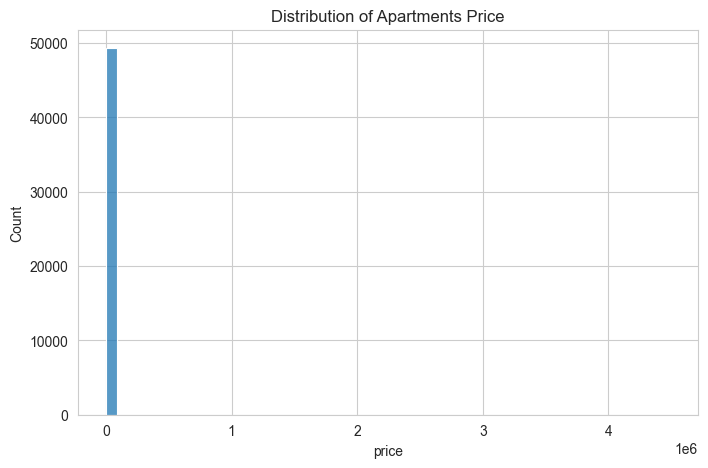

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50)
plt.title("Distribution of Apartments Price")
plt.show()

Следующий шаг — построение ящичковой диаграммы. Что вы можете сказать о целевом показателе? Есть ли выбросы?

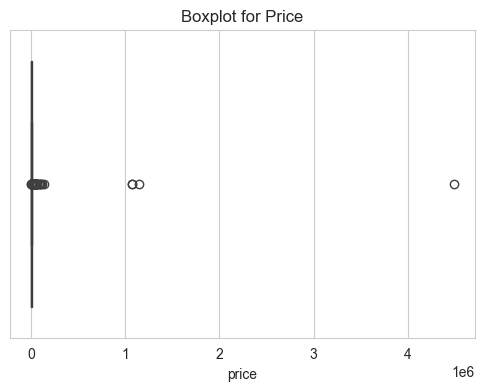

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title('Boxplot for Price')
plt.show()

In [11]:
low, high = df['price'].quantile([0.01, 0.99])
df = df[(df['price'] >= low) & (df['price'] <= high)]

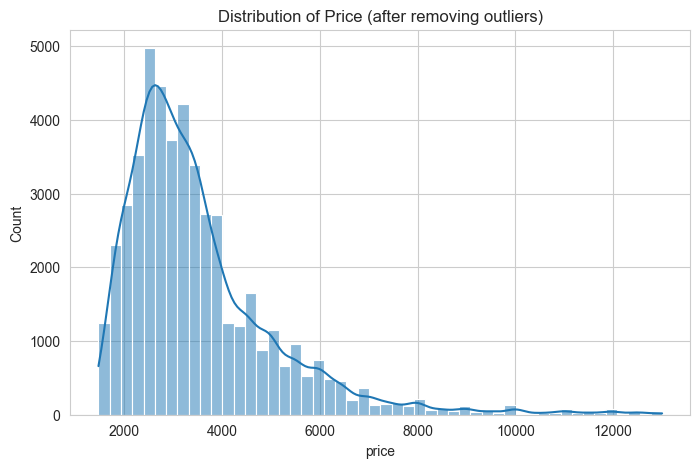

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price (after removing outliers)')
plt.show()

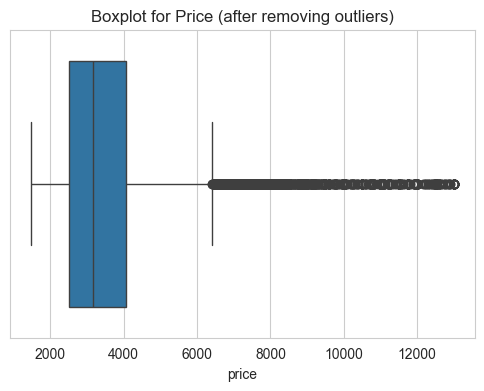

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'], vert=False)
plt.title('Boxplot for Price (after removing outliers)')
plt.show()

Теперь распределение стало более “сглаженным”;

Выбросы удалены → можно работать с более чистыми данными.

IV. Анализ характеристик

a. Каков тип столбца 'interest_level'?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48379 entries, 4 to 124009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       48379 non-null  float64
 1   bedrooms        48379 non-null  int64  
 2   interest_level  48379 non-null  object 
 3   price           48379 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


In [15]:
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


Выведите значения в этом столбце. Сколько записей содержит каждое значение?

In [16]:
df['interest_level'].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

Закодируйте эти значения. Например, вы можете заменить каждое значение на 0, 1 или 2.

In [17]:
df['interest_level'] = df['interest_level'].map({'low':0, 'medium':1, 'high':2})

In [18]:
df['interest_level'].value_counts()

interest_level
0    33697
1    11116
2     3566
Name: count, dtype: int64

Постройте гистограммы для признаков «ванные комнаты» и «спальни». Есть ли выбросы?

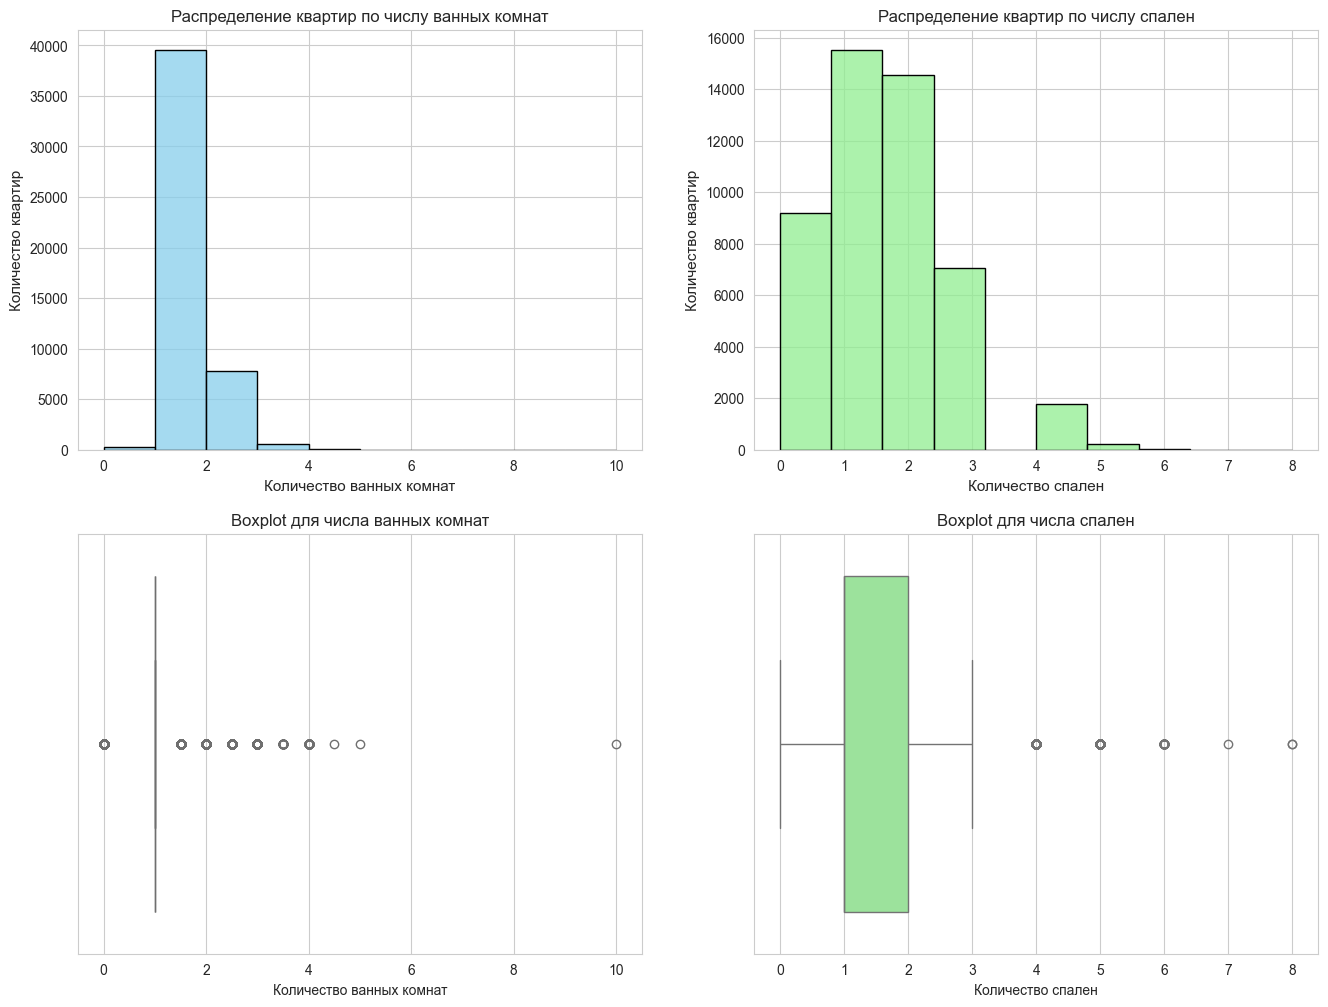

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

sns.histplot(df['bathrooms'], bins=10, ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Распределение квартир по числу ванных комнат', fontsize=12)
axes[0,0].set_xlabel('Количество ванных комнат', fontsize=11)
axes[0,0].set_ylabel('Количество квартир', fontsize=11)

sns.histplot(df['bedrooms'], bins=10, ax=axes[0,1], color='lightgreen', edgecolor='black')
axes[0,1].set_title('Распределение квартир по числу спален', fontsize=12)
axes[0,1].set_xlabel('Количество спален', fontsize=11)
axes[0,1].set_ylabel('Количество квартир', fontsize=11)

sns.boxplot(x=df['bathrooms'], ax=axes[1,0], color='skyblue')
axes[1,0].set_title('Boxplot для числа ванных комнат', fontsize=12)
axes[1,0].set_xlabel('Количество ванных комнат')

sns.boxplot(x=df['bedrooms'], ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Boxplot для числа спален', fontsize=12)
axes[1,1].set_xlabel('Количество спален')

plt.show()

### 3. Создание функций
I. Этот шаг очень обширный. Вы можете создать столько признаков, сколько захотите. Например, вы можете добавить три новых признака, возведённых в квадрат: 'bathrooms_squared', 'bedrooms_squared', ''interest_level_squared''. Постройте матрицу корреляции с новыми признаками. Коррелируют ли новые признаки с целевым показателем сильнее, чем базовые?

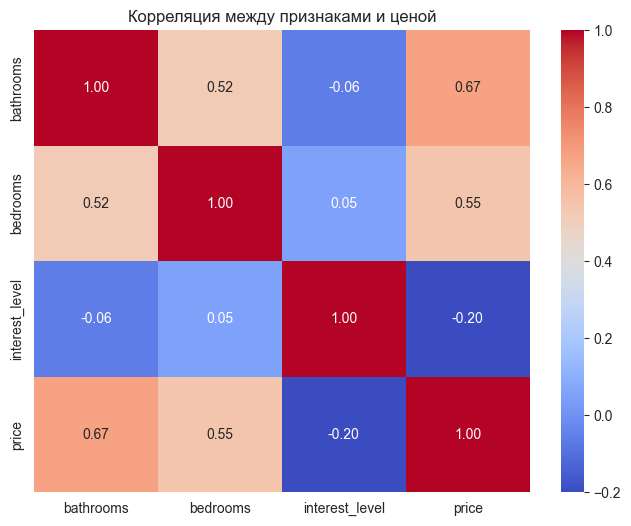

In [20]:
#added new features to df
# df['bathrooms_squared'] = df['bathrooms'] ** 2
# df['bedrooms_squared'] = df['bedrooms'] ** 2
# df['interest_level_squared'] = df['interest_level'] ** 2

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между признаками и ценой')
plt.show()    

In [21]:
corr

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517574,-0.063635,0.671943
bedrooms,0.517574,1.000000,0.050654,0.545948
interest_level,-0.063635,0.050654,1.000000,-0.200111
price,0.671943,0.545948,-0.200111,1.000000


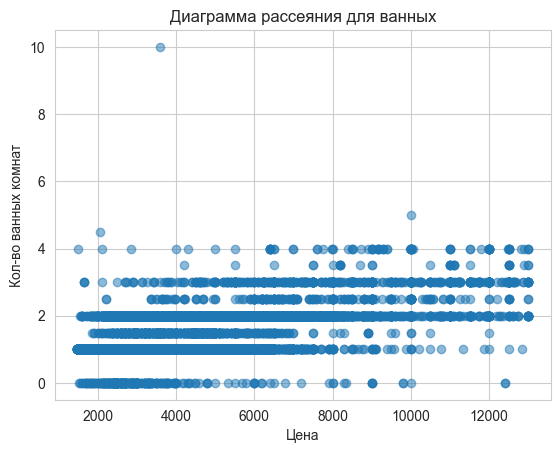

In [22]:
plt.scatter (df['price'], df['bathrooms'], alpha=0.5)
plt.title('Диаграмма рассеяния для ванных')
plt.xlabel('Цена')
plt.ylabel('Кол-во ванных комнат')
plt.show()

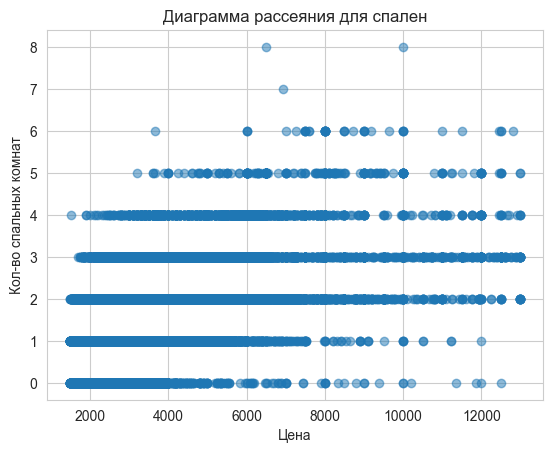

In [23]:
plt.scatter (df['price'], df['bedrooms'], alpha=0.5)
plt.title('Диаграмма рассеяния для спален')
plt.xlabel('Цена')
plt.ylabel('Кол-во спальных комнат')
plt.show()

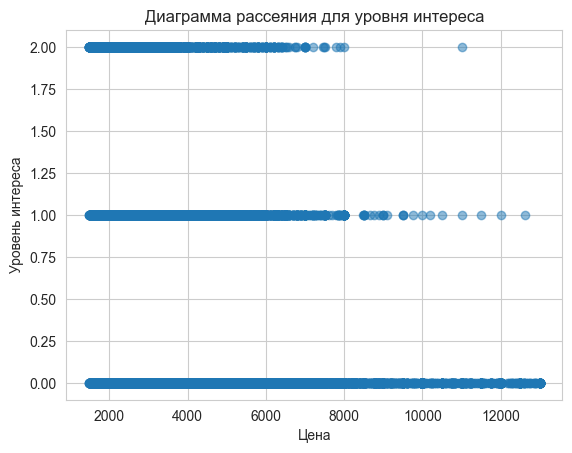

In [24]:
plt.scatter (df['price'], df['interest_level'], alpha=0.5)
plt.title('Диаграмма рассеяния для уровня интереса')
plt.xlabel('Цена')
plt.ylabel('Уровень интереса')
plt.show()

### 4.Создание функций

In [25]:
df_sqr = df.copy()
df_sqr['bathrooms_squared'] = df['bathrooms'] ** 2
df_sqr['bedrooms_squared'] = df['bedrooms'] ** 2
df_sqr['interest_level_squared'] = df['interest_level'] ** 2
corr = df_sqr[['bathrooms', 'bedrooms', 'interest_level', 'bathrooms_squared', 'bedrooms_squared', 'interest_level_squared', 'price']].corr()
corr

,bathrooms,bedrooms,interest_level,bathrooms_squared,bedrooms_squared,interest_level_squared,price
bathrooms,1.000000,0.517574,-0.063635,0.956023,0.548760,-0.059410,0.671943
bedrooms,0.517574,1.000000,0.050654,0.478817,0.928277,0.039511,0.545948
interest_level,-0.063635,0.050654,1.000000,-0.068558,0.046340,0.944013,-0.200111
bathrooms_squared,0.956023,0.478817,-0.068558,1.000000,0.522227,-0.062240,0.648486
bedrooms_squared,0.548760,0.928277,0.046340,0.522227,1.000000,0.035718,0.543406
interest_level_squared,-0.059410,0.039511,0.944013,-0.062240,0.035718,1.000000,-0.182672
price,0.671943,0.545948,-0.200111,0.648486,0.543406,-0.182672,1.000000


Чтобы использовать PolynomialFeatures, нам сначала нужно разделить данные на обучающую и тестовую выборки. Мы уже сделали это за вас, пожалуйста, ознакомьтесь с обучающими и тестовыми данными.

In [39]:
x = df[['bathrooms', 'bedrooms']]
y = df['price']
print(x.isnull().sum())
print(y.isnull().sum())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
print(f'Размер x_train: {x_train.shape}\tРазмер y_train: {y_train.shape}')
print(f'Размер x_test: {x_test.shape}\tРазмер y_test: {y_test.shape}')

bathrooms    0
bedrooms     0
dtype: int64
0
Размер x_train: (38703, 2)	Размер y_train: (38703,)
Размер x_test: (9676, 2)	Размер y_test: (9676,)


Инициализируйте PolynomialFeatures() со степенью 10

In [40]:
poly = PolynomialFeatures(degree=10)

Используйте PolynomialFeatures() для подгонки и преобразования обучающих и тестовых данных.

In [41]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
print(f'Размер x_train_poly: {x_train_poly.shape}')
print(f'Размер x_test: {x_test_poly.shape}')

Размер x_train_poly: (38703, 66)
Размер x_test: (9676, 66)


### 5. Теперь вам нужно обучить 3 модели: линейную регрессию, дерево решений и наивную модель. Мы будем использовать их как «чёрные ящики» без глубокого понимания.

I. Таблица результатов

Создайте два пустых фрейма данных Pandas с колонками «model», «train» и «test». Назовём первый фрейм result_MAE, а второй — result_RMSE. Мы заполним эти таблицы результатами работы моделей.

In [42]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

II. Линейная регрессия

a. Инициализируйте линейную регрессию из sklearn без параметров.

b. Подгоните модель и сделайте прогнозы на основе обучающих и тестовых данных. Сохраните их в виде новых столбцов в данных.

c. Вычислите MAE (среднюю абсолютную ошибку) для обучающих и тестовых данных.

d. Рассчитайте среднеквадратичную ошибку (RMSE) для обучающих и тестовых данных.

e. Вставьте свои показатели в таблицы result_MAE и result_RMSE с названием модели «линейная регрессия».

In [43]:
# Инициализация и обучение
lr = LinearRegression()
lr.fit(x_train, y_train)

# Предсказания
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# Метрики
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Добавляем в таблицы
result_MAE.loc[len(result_MAE)] = ['linear_regression', mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ['linear_regression', rmse_train, rmse_test]

In [44]:
result_MAE

,model,train,test
0,linear_regression,785.738606,781.354933


In [45]:
result_RMSE

,model,train,test
0,linear_regression,1127.394102,1109.728827


In [46]:
# Инициализация и обучение
dt = DecisionTreeRegressor(random_state=21)
dt.fit(x_train, y_train)

# Предсказания
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Метрики
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Добавляем в таблицы
result_MAE.loc[len(result_MAE)] = ['decision_tree', mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', rmse_train, rmse_test]

In [47]:
result_MAE

,model,train,test
0,linear_regression,785.738606,781.354933
1,decision_tree,756.704419,753.850437


In [48]:
result_RMSE

,model,train,test
0,linear_regression,1127.394102,1109.728827
1,decision_tree,1078.967775,1073.521803


In [49]:
# Среднее и медиана
mean_train = y_train.mean()
median_train = y_train.median()

# Предсказания
y_pred_mean_train = [mean_train] * len(y_train)
y_pred_mean_test = [mean_train] * len(y_test)

y_pred_median_train = [median_train] * len(y_train)
y_pred_median_test = [median_train] * len(y_test)

# Метрики
for name, y_pred_tr, y_pred_te in [
    ('naive_mean', y_pred_mean_train, y_pred_mean_test),
    ('naive_median', y_pred_median_train, y_pred_median_test)
]:
    mae_train = mean_absolute_error(y_train, y_pred_tr)
    mae_test = mean_absolute_error(y_test, y_pred_te)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_tr))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_te))

    result_MAE.loc[len(result_MAE)] = [name, mae_train, mae_test]
    result_RMSE.loc[len(result_RMSE)] = [name, rmse_train, rmse_test]

VI. Сравните результаты

Распечатайте итоговые таблицы result_MAE и result_RMSE.

Какая модель лучше?

In [50]:
result_MAE

,model,train,test
0,linear_regression,785.738606,781.354933
1,decision_tree,756.704419,753.850437
2,naive_mean,1140.445303,1136.621987
3,naive_median,1087.459008,1081.216618


In [51]:
result_RMSE

,model,train,test
0,linear_regression,1127.394102,1109.728827
1,decision_tree,1078.967775,1073.521803
2,naive_mean,1598.460491,1594.392461
3,naive_median,1645.459174,1639.336503


Для тренировочной выборки лучше всех себя показали модели ***linear_regression*** и ***decision_tree***. Однако на тестовой выборке наилучший результат показал ***decision_ tree***.